###Import the libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("D:/miniproject/movies.csv")
ratings = pd.read_csv("D:/miniproject/ratings.csv/ratings.csv")

as in movies data genre is not required we drop it

In [2]:
movies=movies[['movieId','title']]
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


as in ratings the timestamp is not required we drop it



In [3]:
ratings=ratings.iloc[:,0:3]
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


Unique values of movieId and userId

In [4]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


In [5]:
user_freq = ratings.groupby('userId').count().reset_index()
user_freq.head(20)

,userId,movieId,rating
0,1,232,232
1,2,29,29
2,3,39,39
3,4,216,216
4,5,44,44
5,6,314,314
6,7,152,152
7,8,47,47
8,9,46,46
9,10,140,140


In [6]:
# as movieId and rating has same count so we will drop one column to reduce 
#dimensionality and assign new label to it

user_freq = ratings[['userId','rating']].groupby('userId').count().reset_index()
user_freq.columns=['userId','n_ratings']
user_freq.head(20)

,userId,n_ratings
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
5,6,314
6,7,152
7,8,47
8,9,46
9,10,140


In [7]:
#average number of ratings given by a user
print(f"Mean number of ratings for a given user: {user_freq['n_ratings'].mean():.2f}.")

Mean number of ratings for a given user: 165.30.


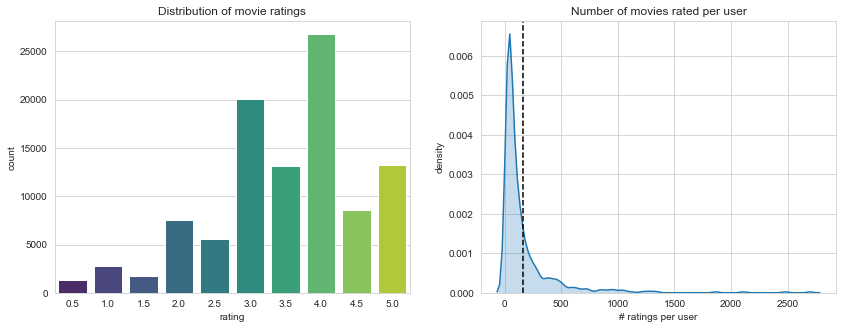

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of movies rated per user")
plt.show()

By the above graph we can see that lot of movies(25000) has been rated 4 and also the number of rated per user can be analysed to be around 160-180

In [9]:
#Merging both the dataframes
data = pd.merge(movies, ratings , how='outer', on='movieId')
user_movie_table = ratings.pivot_table(index = "movieId",columns = "userId",values = "rating")

we have converted the data into a format where columns are the unique userID while rows are the ratings for each movieId by that userId

In [10]:
user_movie_table.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


handling nan values and fill it will 0

In [11]:
user_movie_table.fillna(0,inplace=True)
user_movie_table.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Aggregating the number of users who voted and the number of movies that were voted

In [12]:
no_user_voted = data.groupby('movieId')['rating'].agg('count')
no_movies_voted = data.groupby('userId')['rating'].agg('count')

In [13]:
no_user_voted.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [14]:
no_movies_voted.head()

userId
1.0    232
2.0     29
3.0     39
4.0    216
5.0     44
Name: rating, dtype: int64

In [15]:
user_movie_table.shape

(9724, 610)

for a movie to qualify, a minimum of 10 users should have voted a movie.

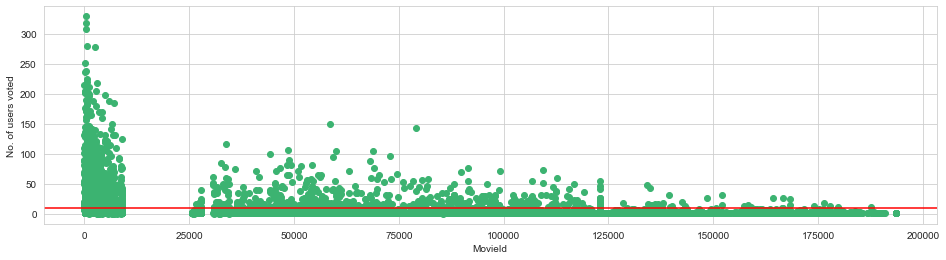

In [16]:
f,ax = plt.subplots(1,1,figsize=(16,4))

plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [17]:
user_movie_table = user_movie_table.loc[no_user_voted[no_user_voted > 10].index,:]

for a user to qualify, a minimum of 50 movies should have voted by the user.

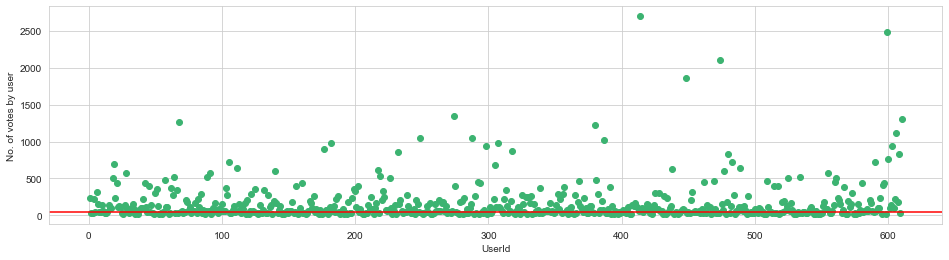

In [18]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [19]:
user_movie_table=user_movie_table.loc[:,no_movies_voted[no_movies_voted > 50].index]
user_movie_table.head()

userId,1.0,4.0,6.0,7.0,10.0,11.0,15.0,16.0,17.0,18.0,...,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,610.0
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [20]:
user_movie_table.shape

(2121, 378)

Removing Sparsity--
here as we see in the data we have lot of 0 values
so it can make our model run out of computational resources and leads to error in accuracy

In [21]:
user_movie_table_matrix = csr_matrix(user_movie_table.values)
print(user_movie_table_matrix)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [22]:
knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs=-1)
knn.fit(user_movie_table_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [23]:
user_movie_table.head()

userId,1.0,4.0,6.0,7.0,10.0,11.0,15.0,16.0,17.0,18.0,...,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,610.0
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [24]:
user_movie_table.columns

Float64Index([  1.0,   4.0,   6.0,   7.0,  10.0,  11.0,  15.0,  16.0,  17.0,
               18.0,
              ...
              600.0, 601.0, 602.0, 603.0, 604.0, 605.0, 606.0, 607.0, 608.0,
              610.0],
             dtype='float64', name='userId', length=378)

#example


In [25]:
movie_list = movies[movies['title'].str.contains('Iron Man')] 
print(movie_list)

      movieId                                  title
6743    59315                        Iron Man (2008)
7324    77561                      Iron Man 2 (2010)
8142   102007        Invincible Iron Man, The (2007)
8151   102125                      Iron Man 3 (2013)
9058   142056  Iron Man & Hulk: Heroes United (2013)
9444   167296                        Iron Man (1931)


for accessing the particular movieid for the row add row numbers

In [31]:
user_movie_table['row_n']=np.arange(len(user_movie_table))


In [27]:
user_movie_table.head()

userId,1.0,4.0,6.0,7.0,10.0,11.0,15.0,16.0,17.0,18.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,610.0,row_n
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0,0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,1
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0,4


create a function that takes movie name and gives 10 movies which are closest to it 

In [28]:
def movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = user_movie_table[user_movie_table.index == movie_idx]['row_n']
        distances , indices = knn.kneighbors(user_movie_table_matrix[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = user_movie_table.index[val[0]]
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [29]:
movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [30]:
movie_recommendation('Avatar')

,Title,Distance
1,Zombieland (2009),0.398180
2,Inception (2010),0.393521
3,I Am Legend (2007),0.389856
4,"Hangover, The (2009)",0.364190
5,"Dark Knight, The (2008)",0.358937
6,Kung Fu Panda (2008),0.358604
7,Iron Man (2008),0.310893
8,District 9 (2009),0.309947
9,WALL·E (2008),0.306969
10,Up (2009),0.289607
